# Abalone Case Study

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('Abalone.csv')

First 5 entries

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

The dataset contains 4177 rows and 9 columns

Datatype of the features

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Column Names

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Information about the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


unique values of column Rings

In [8]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [9]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

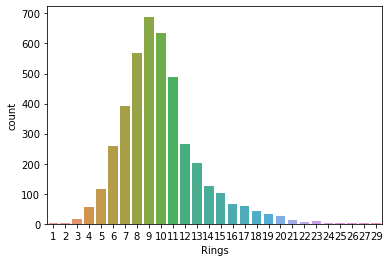

In [10]:
sns.countplot(x='Rings',data=df)

Count of rings is at peak at 9

# Missing Values

In [11]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Heatmap of the null values.

<AxesSubplot:>

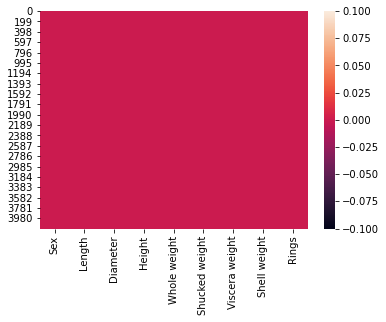

In [12]:
sns.heatmap(df.isnull())

# Statistical Calculation

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Mean is less than 75 percentile.There are no extreme outliers.Except Height all the other columns have a non-zero value.

Statistical heatmap

<AxesSubplot:>

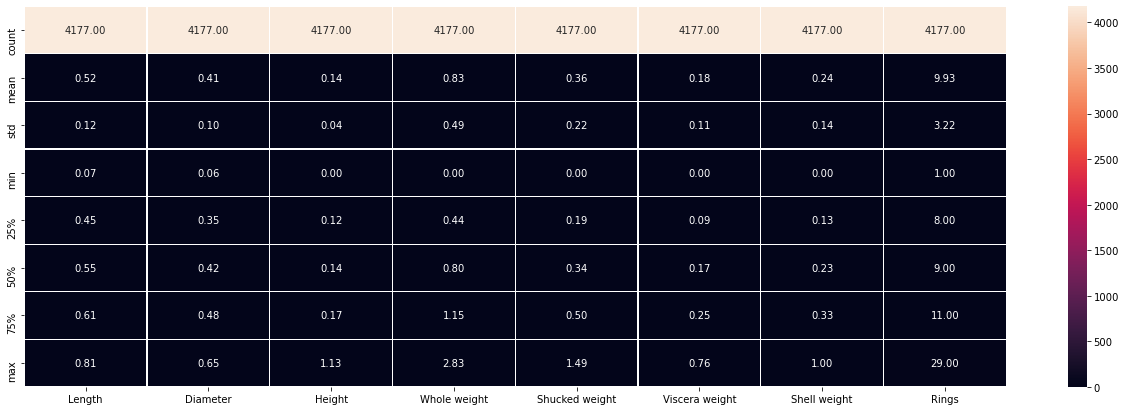

In [14]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

# Checking Correlation

In [15]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

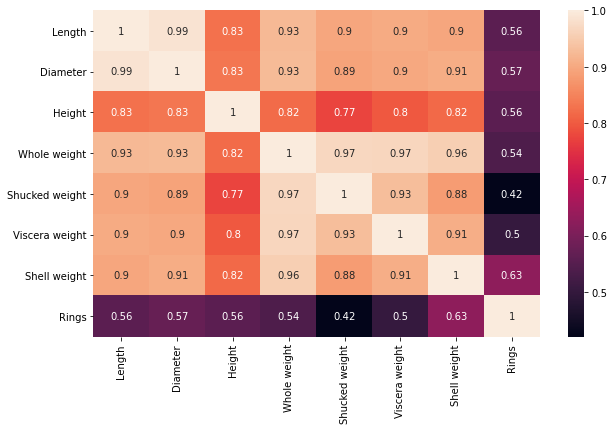

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

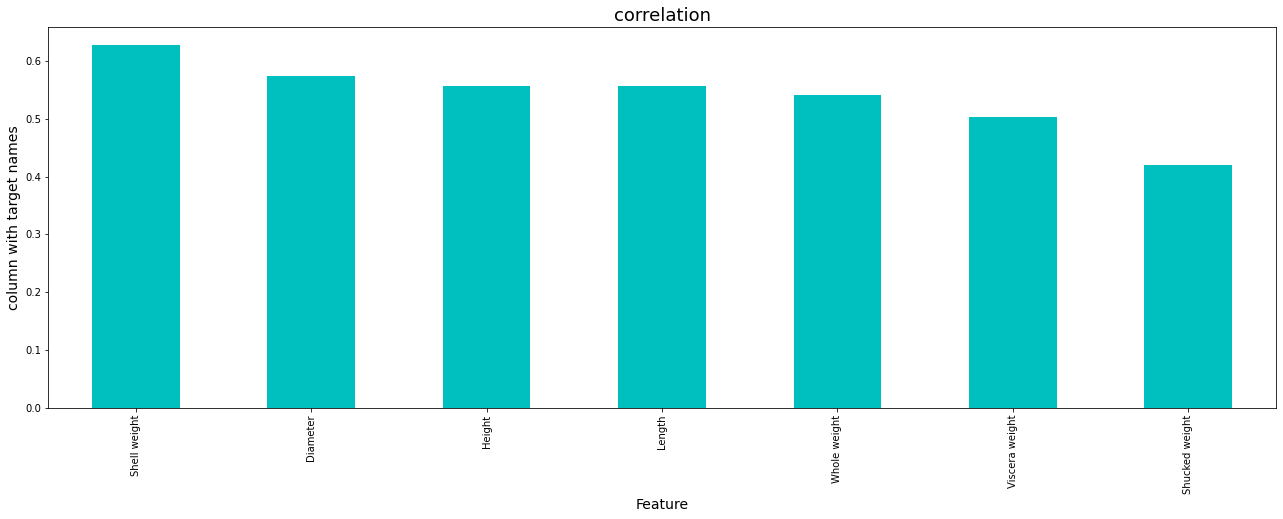

In [17]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

All features are in positive correlation with target variable. Highest correlation is of shell weight

countplot of column 'sex'

<AxesSubplot:xlabel='Sex', ylabel='count'>

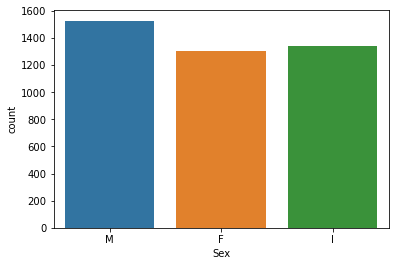

In [18]:
sns.countplot(x='Sex',data=df)

Count of Male is slightly more than female and infants

# Distribution and probability plot

'Length','Diameter' are negatively skewed.
'Height','Shell weight','Rings' columns are Positively skewed.
'whole weight' is normally distributed

In [19]:
numerical_features=df.select_dtypes(include=[np.number]).columns
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [20]:
categorical_features=df.select_dtypes(include=[np.object]).columns
categorical_features

Index(['Sex'], dtype='object')

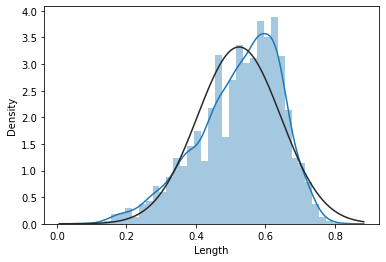

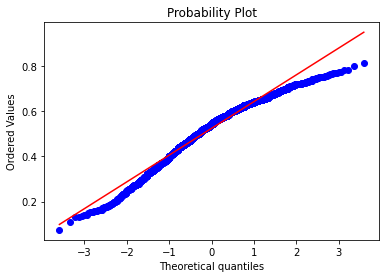

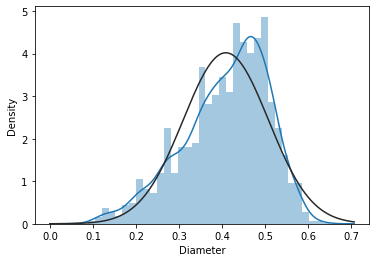

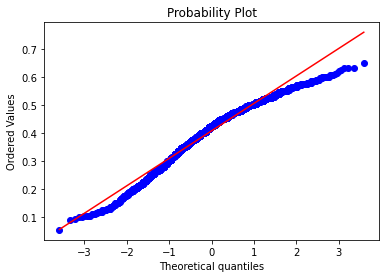

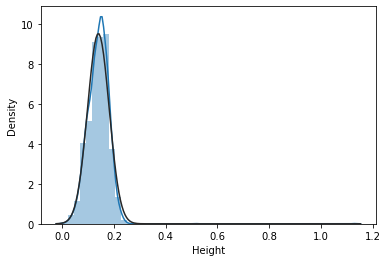

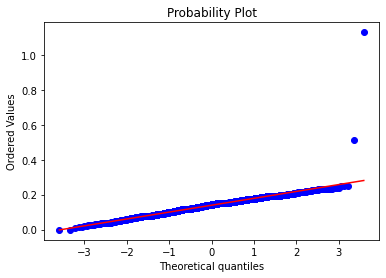

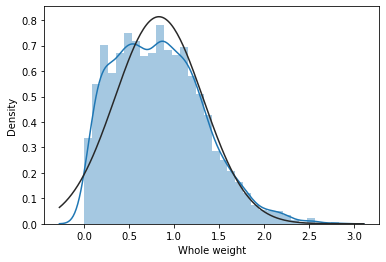

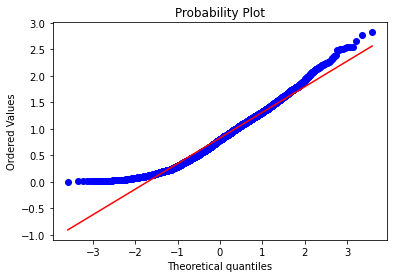

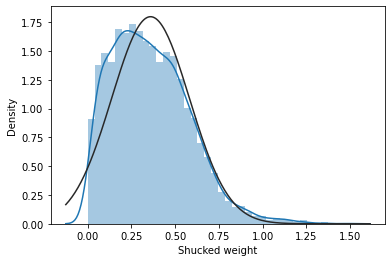

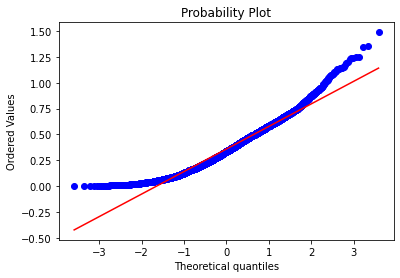

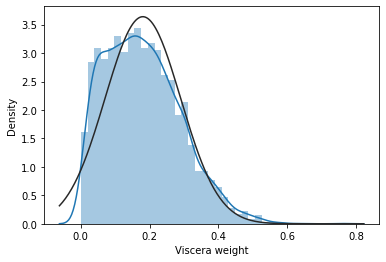

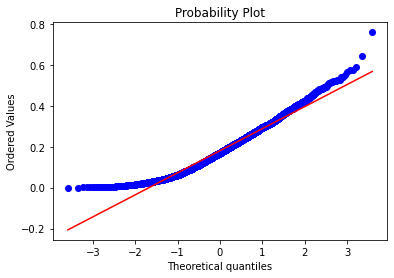

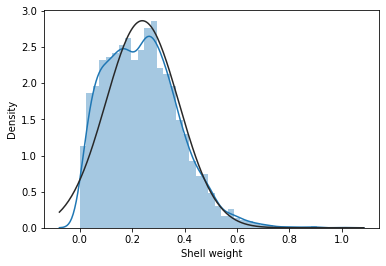

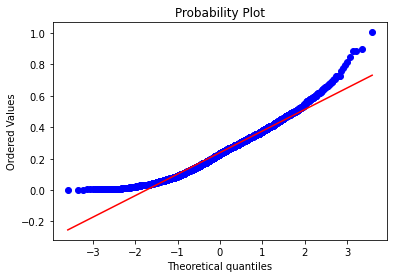

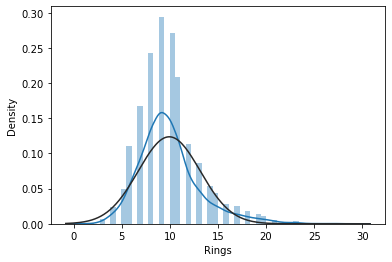

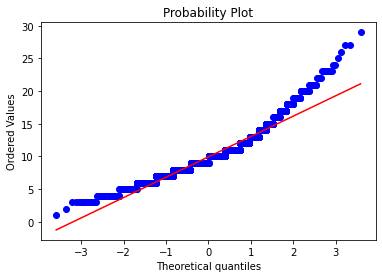

In [21]:
coll=numerical_features.values
for i in range(0,len(coll)):
    plt.figure()
    sns.distplot(df[coll[i]],fit=norm)
    plt.figure()
    res=stats.probplot(df[coll[i]],plot=plt)
    

# Bivariate Analysis

Values of rings are at peak at 24 and 29 rings.

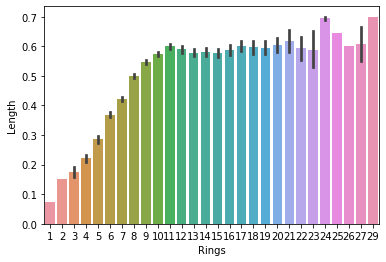

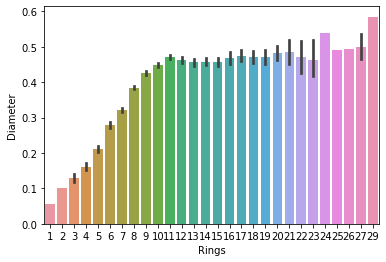

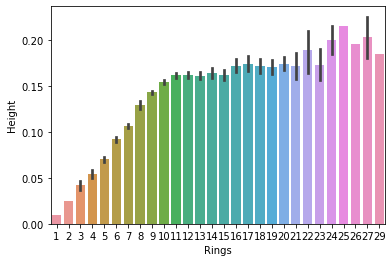

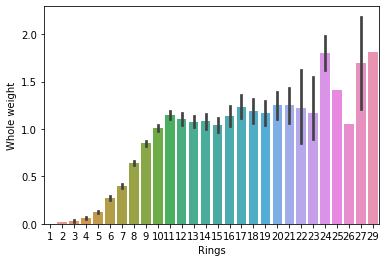

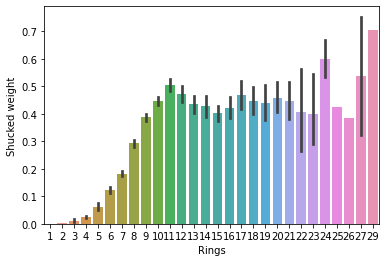

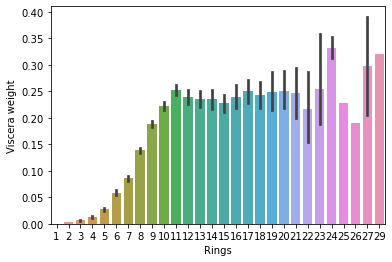

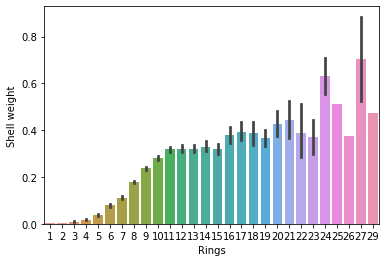

In [22]:
coll=(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])
for i in range(0,len(coll)):
    plt.figure()
    sns.barplot(data=df, x="Rings", y=df[coll[i]])

# Box Plots showing outliers

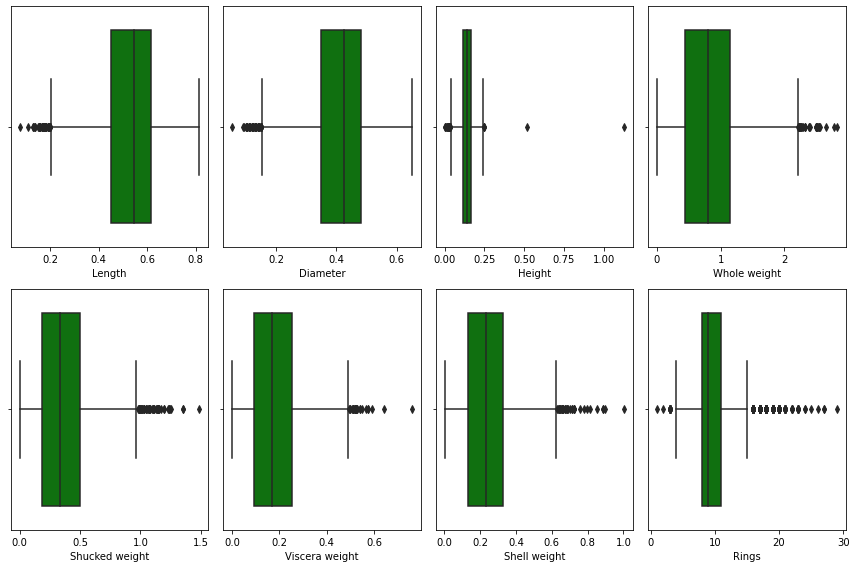

In [23]:
collist=numerical_features.values
ncol=4
nrows=2
plt.figure(figsize=(12,2*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Multivariate Analysis

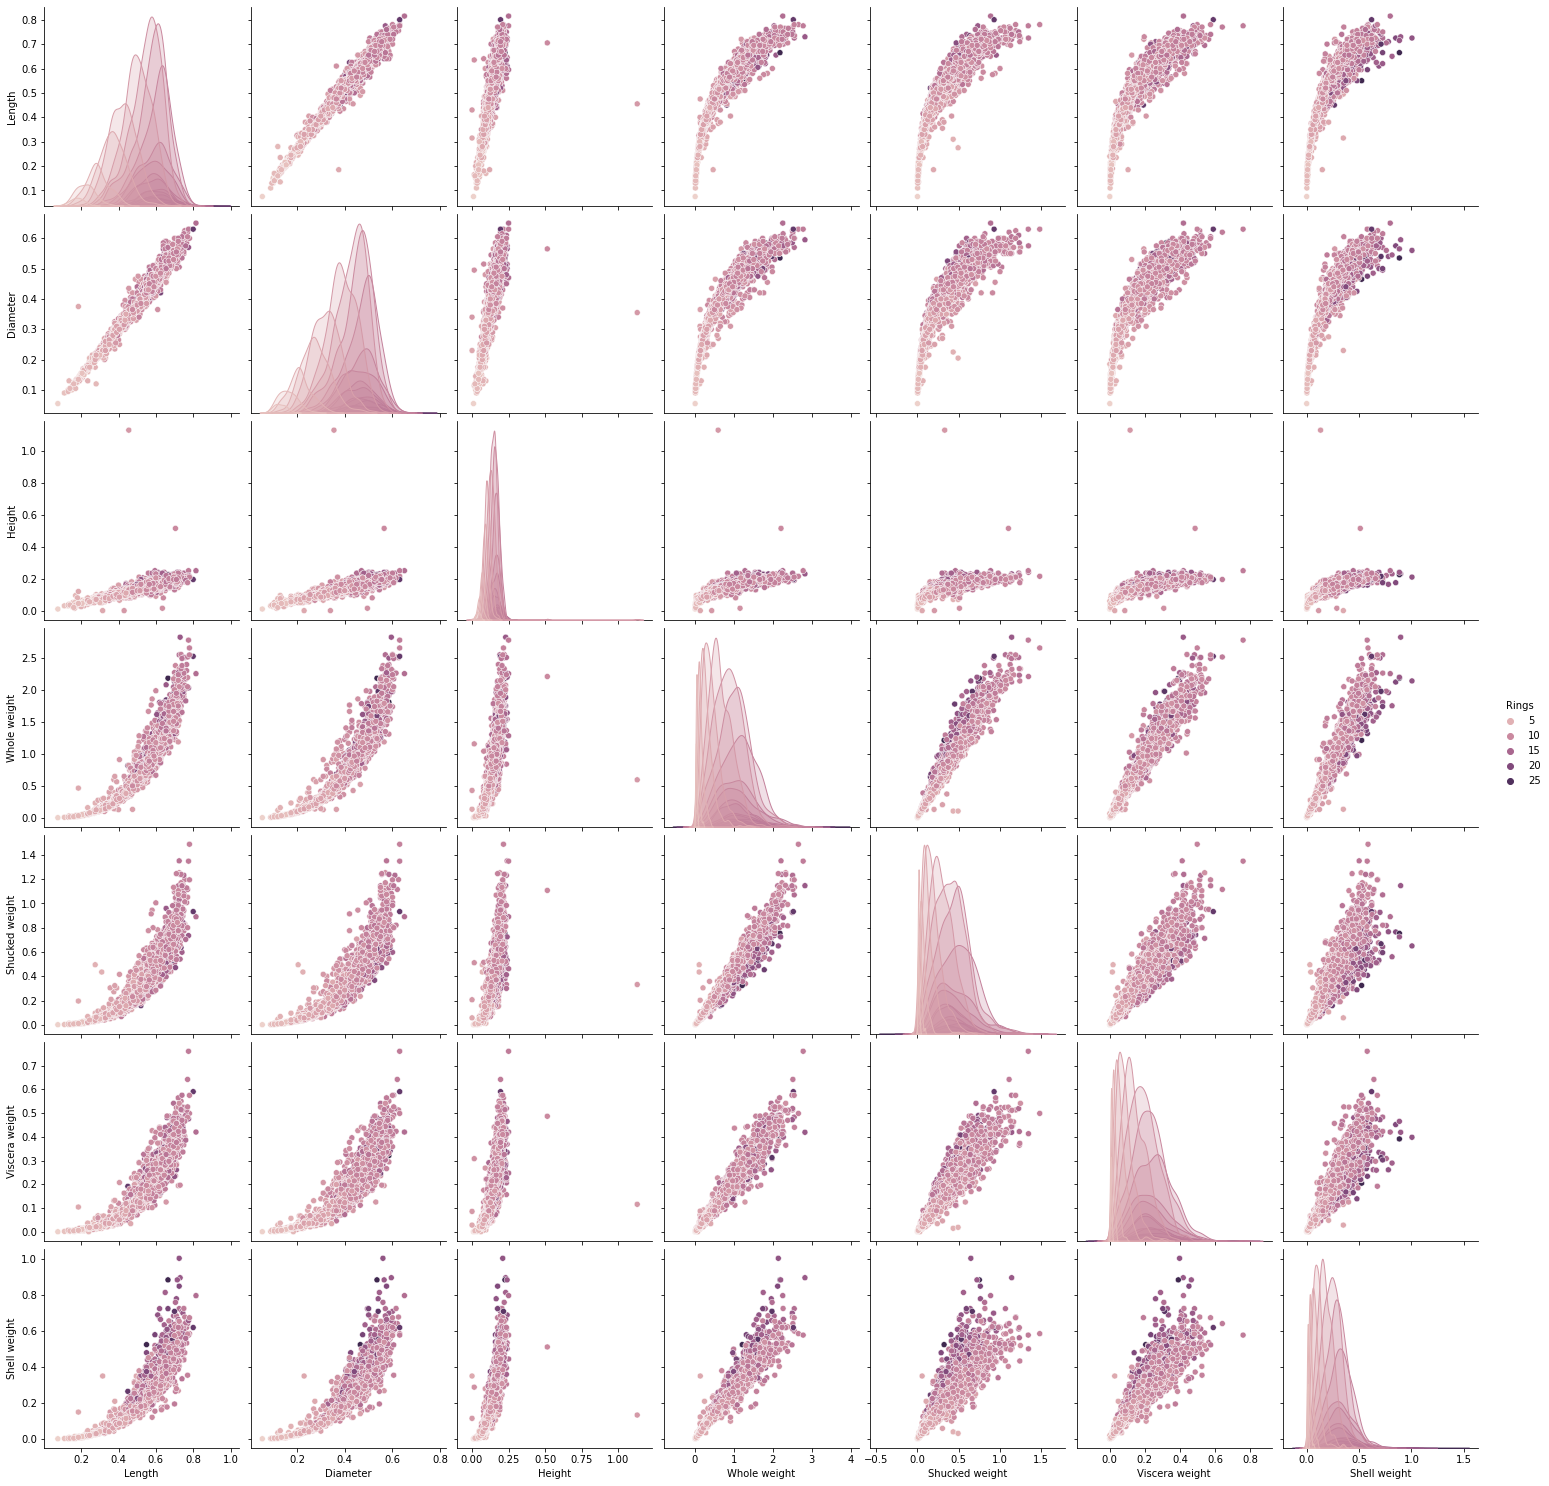

In [24]:
sns.pairplot(df,hue="Rings",size=3)

# Skewness

In [25]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Separating x(Independent) and y(target) variable.

In [26]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [27]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# Removing Skewness

In [28]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [29]:
x.skew()

Length           -0.068660
Diameter         -0.026554
Height            1.099602
Whole weight     -0.038066
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
dtype: float64

# Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
x['Sex']=LE.fit_transform(x['Sex'])

In [31]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.207025,0.133225,0.090754,0.414755,0.202533,0.096219,0.139762
1,2,0.122500,0.070225,0.086178,0.203349,0.094856,0.047361,0.067659
2,0,0.280900,0.176400,0.126633,0.517006,0.228330,0.132343,0.190620
3,2,0.193600,0.133225,0.117783,0.416075,0.195156,0.107957,0.144100
4,1,0.108900,0.065025,0.076961,0.186480,0.085719,0.038740,0.053541


# Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [33]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.305800,0.310388,0.120026,0.308099,0.221348,0.169470,0.199185
1,1.0,0.177460,0.160200,0.113973,0.150297,0.103084,0.082967,0.095311
2,0.0,0.417970,0.413314,0.167476,0.384423,0.249682,0.233428,0.272452
3,1.0,0.285416,0.310388,0.155773,0.309084,0.213246,0.190253,0.205435
4,0.5,0.156810,0.147804,0.101784,0.137705,0.093049,0.067704,0.074973


# Finding the best random state

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:0.5579011195688988
At random state0,the testing accuracy is:0.5436960340239096


At random state1,the training accuracy is:0.562008026094904
At random state1,the testing accuracy is:0.5332709405055351


At random state2,the training accuracy is:0.5497566567713161
At random state2,the testing accuracy is:0.5607115416647761


At random state3,the training accuracy is:0.5670089740599402
At random state3,the testing accuracy is:0.5127903347766956


At random state4,the training accuracy is:0.5586195096058475
At random state4,the testing accuracy is:0.5403274896488512


At random state5,the training accuracy is:0.5695090521267674
At random state5,the testing accuracy is:0.5148914266391921


At random state6,the training accuracy is:0.5416336129476456
At random state6,the testing accuracy is:0.5811509474193437


At random state7,the training accuracy is:0.5497497478534885
At random state7,the testing accuracy is:0.5579756931881485


At random state8,

# Train Test Split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

# Linear Regression

In [36]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5038931531309465


# Cross Validation

In [37]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At crossfold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At crossfold 2 the cv score is 0.5442617928149825 and accuracy score for training is -0.5125388870112617 and accuracy for testing is 0.5038931531309465


At crossfold 3 the cv score is 0.5273949830414435 and accuracy score for training is -0.5125388870112617 and accuracy for testing is 0.5038931531309465


At crossfold 4 the cv score is 0.44631380391414005 and accuracy score for training is -0.5125388870112617 and accuracy for testing is 0.5038931531309465


At crossfold 5 the cv score is 0.441935681476347 and accuracy score for training is -0.5125388870112617 and accuracy for testing is 0.5038931531309465


At crossfold 6 the cv score is 0.44483034717023306 and accuracy score for training is -0.5125388870112617 and accuracy for testing is 0.5038931531309465


At crossfold 7 the cv score is 0.46902465454992487 and accuracy score for training is -0.5125388870112617 and accuracy for testing is 0.5038931531309465


At crossfold 8 the cv score is 0.4037568564018147 and accuracy score for t

# Plot of Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

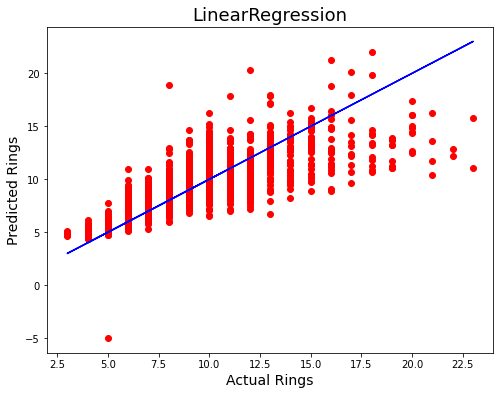

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Rings',fontsize=14)
plt.ylabel('Predicted Rings',fontsize=14)
plt.title('LinearRegression',fontsize=18)
plt.show

# Regularisation

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [40]:
ls=Lasso(alpha=0.0001, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5041953509811281

In [41]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.5444906338404597

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


# Ensemble

In [44]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

R2 score: 52.424249359965394


In [45]:
rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 54.429200486442376


# Saving the Model

In [46]:
import pickle
filename='rings.pkl'
pickle.dump(rf,open(filename,'wb'))

# Prediction

In [47]:
loaded_model=pickle.load(open('rings.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5242424935996539


In [48]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253
Predicted,10.03,9.18,6.57,9.26,10.42,11.46,9.9,10.03,12.7,6.44,...,9.84,17.33,10.91,8.75,14.15,10.52,8.09,8.53,14.25,5.3
Original,10.03,9.18,6.57,9.26,10.42,11.46,9.9,10.03,12.7,6.44,...,9.84,17.33,10.91,8.75,14.15,10.52,8.09,8.53,14.25,5.3
